# Multiple Variable Linear Regression


In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [30]:
#table = pd.read_csv(r'C:\Users\muhad\DAV\Level_2\Final DataSet.csv')
table=table.drop('User',axis=1)
table.head()

,Phone_Usage,Time_Spent_On_Entertainment_App,Time_Spent_On_Educational_App,Health_Fitness_App,Loneliness_Scale,Confidence_Scale,Grades
0,845.260000,2,3,5,2,4,2.863
1,510.178611,4,1,5,2,4,3.505
2,1063.928611,2,2,5,2,5,2.800
3,515.248889,1,1,5,3,3,3.029
4,348.536389,1,2,5,4,2,3.679


In [31]:
reg = linear_model.LinearRegression()

In [32]:
data_x = table[['Phone_Usage','Time_Spent_On_Entertainment_App', 'Time_Spent_On_Educational_App', 'Health_Fitness_App', 'Loneliness_Scale', 'Confidence_Scale']]
data_y = table[['Grades']]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(data_x, data_y,test_size=0.2)
reg.fit(x_train,y_train)
        

LinearRegression()

In [34]:
y_pred = reg.predict(x_test)

In [35]:
reg.predict([[200,2,2,5,2,4]])

array([[3.268222]])

In [36]:
reg.coef_

array([[-0.00037089,  0.0828171 ,  0.02843892, -0.00949733,  0.36425184,
         0.23290462]])

In [37]:
reg.intercept_

array([1.50725343])

In [38]:
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('Coefficient of determination: ', r2_score(y_test, y_pred))


Mean squared error:  0.24516098641210093
Coefficient of determination:  -0.669534272820087


In [39]:
data_x = sm.add_constant(data_x)
model = sm.OLS(data_y, data_x).fit()
predictions = model.predict(data_x)
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                 Grades   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     1.562
Date:                Wed, 26 May 2021   Prob (F-statistic):              0.194
Time:                        22:10:54   Log-Likelihood:                -9.0630
No. Observations:                  36   AIC:                             32.13
Df Residuals:                      29   BIC:                             43.21
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

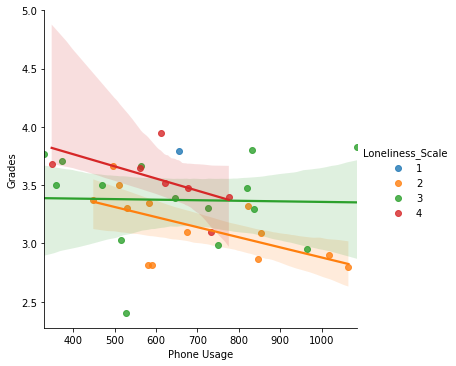

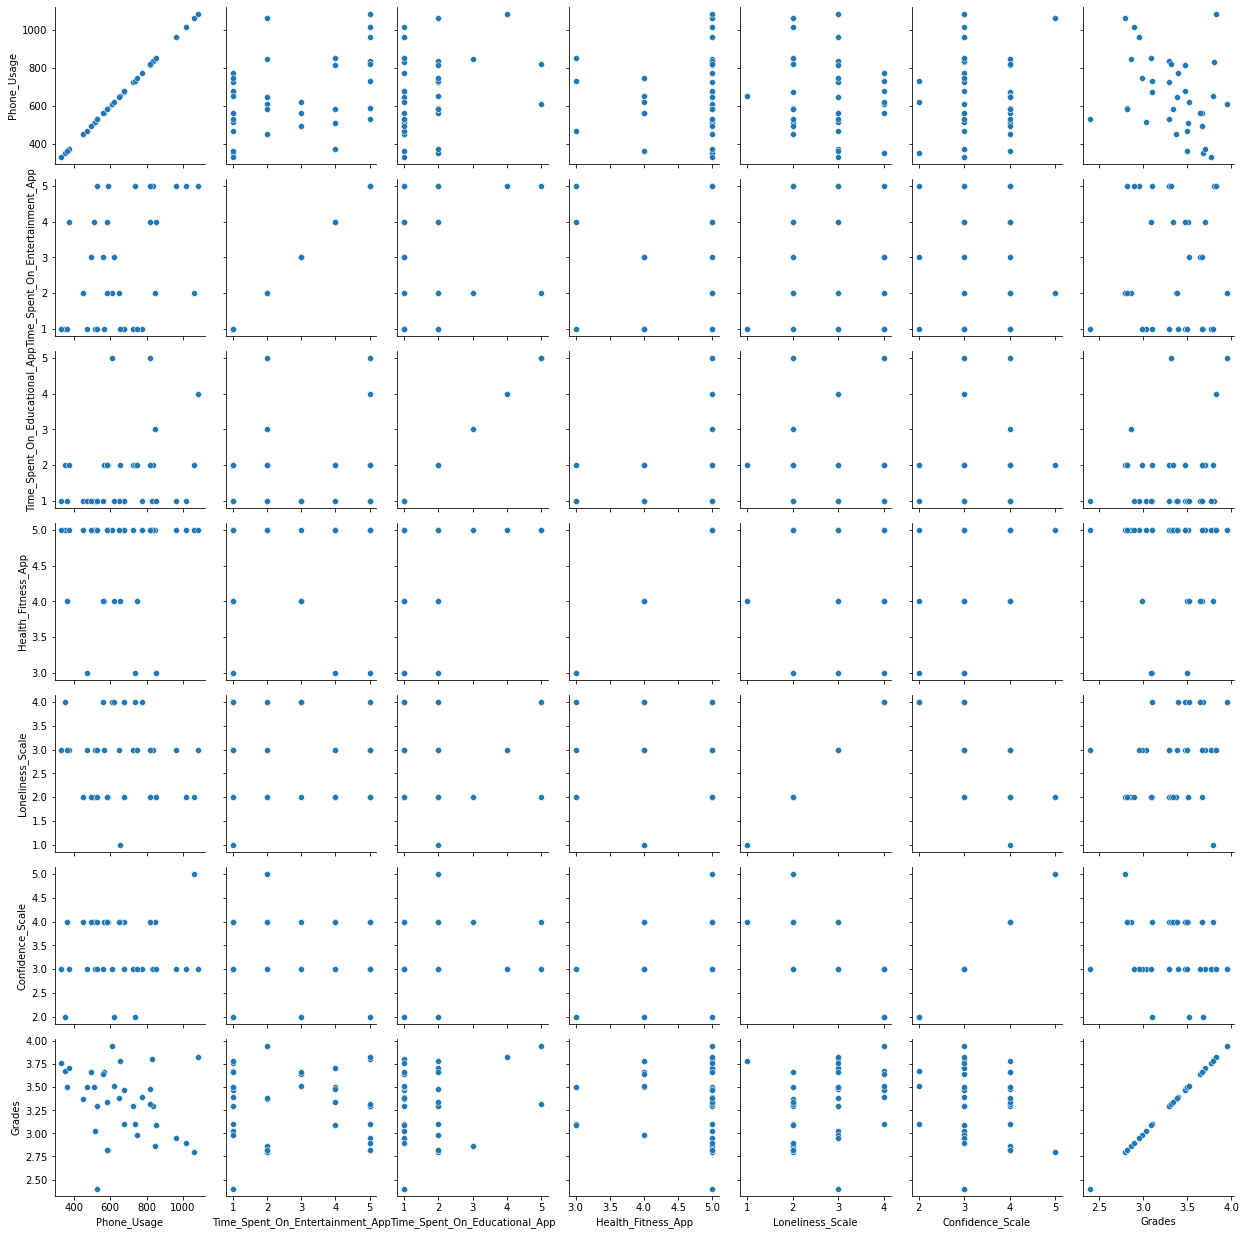

In [62]:
import seaborn as sns
import pandas as pd
 
sns.set_style()
# Load the dataset

#print(table.head())

g = sns.lmplot(
    data=table,
    x="Phone_Usage", y="Grades", hue="Loneliness_Scale",
    height=5
)
 

g.set_axis_labels("Phone Usage", "Grades")

 

g = sns.PairGrid(table)
g.map(sns.scatterplot)
g.savefig("Multiple Linear Regression.jpg")

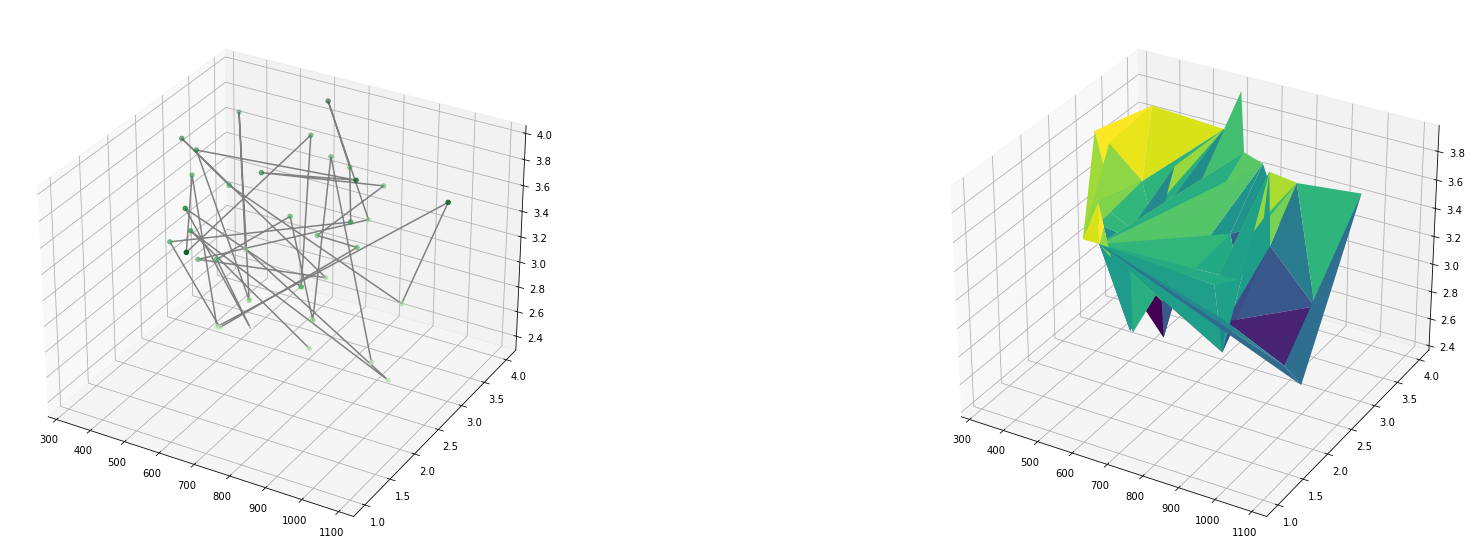

Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  -0.6048502832934464


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  -0.8686533996864709


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  -4.084464805036567


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  -631.9549937085504


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  -6.6590259931815785


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  -93.4484109184474


Return the coefficient of determination R^2 of the prediction, i.e. the model score is:  -125.07820981217749




Text(0, 0.5, 'Predicted Grades')

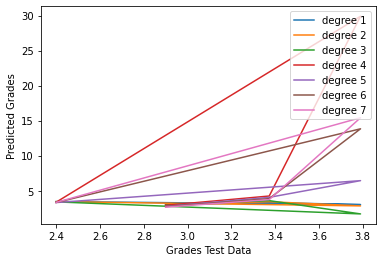

In [60]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d




X = table[['Phone_Usage','Loneliness_Scale', ]]
X1 = table['Phone_Usage']
X2 = table['Loneliness_Scale']

y = table['Grades']


#Split Dataset to Train and Test Dataset
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=42)
X11 = table['Phone_Usage']
X12 = table['Loneliness_Scale']







fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(1,2,1, projection = '3d')
ax.scatter3D(X1, X2, y, c=y, cmap='Greens')
ax.plot3D(X1, X2, y, 'gray')


# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(X1, X2, y, cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')


#Build the model
ax = fig.add_subplot(2, 2, 1, projection='3d')
for degree in [1,2,3,4,5,6,7]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Return the coefficient of determination R^2 of the prediction, i.e. the model score is: ",model.score(x_test, y_test))
    print("\n")
    plt.plot(y_test, y_pred, label="degree %d" % degree)
    plt.legend(loc='upper right')
plt.xlabel("Grades Test Data")
plt.ylabel("Predicted Grades")
